### Iris Data set using Colaboratory

This document contains the solution to Iris Data set using simple neural network.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
%matplotlib inline

In [38]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
# Google drive file 
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt  

Hello Google Drive!

In [44]:
# Load data as pandas dataframe
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/iris.csv', names=["Sepal Len", "Sepal Wid", "Petal Len", "Petal Wid", "Type"])
print(df.head())

   Sepal Len  Sepal Wid  Petal Len  Petal Wid         Type
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa


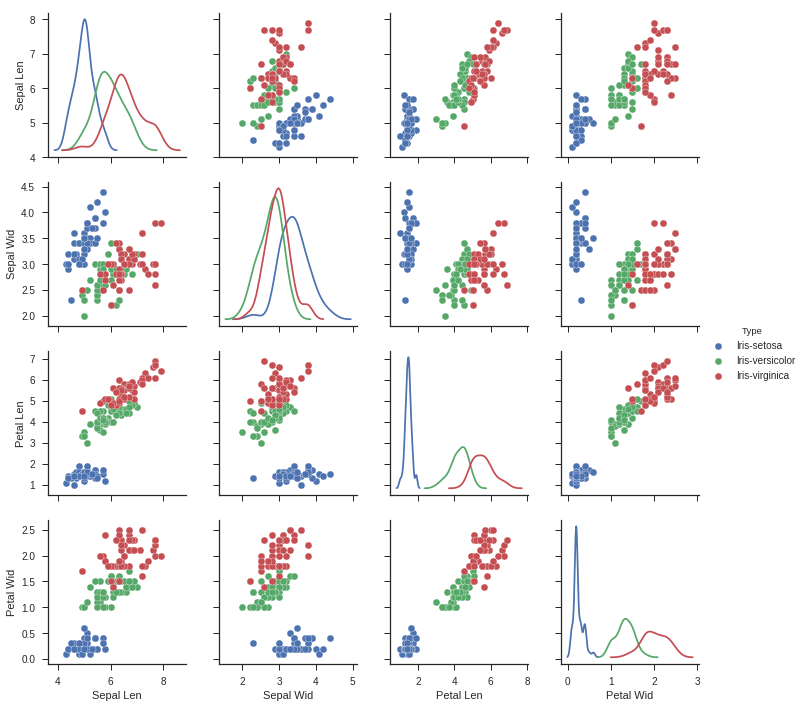

In [48]:
# Scatter matrix plot using seabron
sns.set(style='ticks')
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.show()

In [52]:
# Numerical representation of Iris type
df.loc[df['Type'] == 'Iris-setosa', 'Type'] = 0
df.loc[df['Type'] == 'Iris-versicolor', 'Type'] = 1
df.loc[df['Type'] == 'Iris-virginica', 'Type'] = 2
print(df.head())

     Sepal Len  Sepal Wid  Petal Len  Petal Wid  Type
47         4.6        3.2        1.4        0.2     0
119        6.0        2.2        5.0        1.5     2
36         5.5        3.5        1.3        0.2     0
79         5.7        2.6        3.5        1.0     1
107        7.3        2.9        6.3        1.8     2


In [54]:
df=df.iloc[np.random.permutation(len(df))]
print(df.head())

     Sepal Len  Sepal Wid  Petal Len  Petal Wid  Type
56         6.3        3.3        4.7        1.6     1
12         4.8        3.0        1.4        0.1     0
26         5.0        3.4        1.6        0.4     0
107        7.3        2.9        6.3        1.8     2
32         5.2        4.1        1.5        0.1     0


In [55]:
# Pandas data to numpy array
X = df.drop(columns='Type').values
Y = df['Type'].values
print(X[0:5,:])
print(Y[0:5])
print(X.shape, Y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",Y[:3])

[[6.3 3.3 4.7 1.6]
 [4.8 3.  1.4 0.1]
 [5.  3.4 1.6 0.4]
 [7.3 2.9 6.3 1.8]
 [5.2 4.1 1.5 0.1]]
[1 0 0 2 0]
(150, 4) (150,)
Examples of X
 [[6.3 3.3 4.7 1.6]
 [4.8 3.  1.4 0.1]
 [5.  3.4 1.6 0.4]]
Examples of y
 [1 0 0]


In [62]:
# Train test split
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, random_state=8737)
print(x_tr.shape[1], x_te.shape, y_tr.shape, y_te.shape)
print(len(x_tr))
y_tr=np_utils.to_categorical(y_tr,num_classes=3)
y_te=np_utils.to_categorical(y_te,num_classes=3)

4 (30, 4) (120,) (30,)
120


In [68]:
# Build multiple hidden layer network
model = Sequential()
model.add(Dense(1000, input_dim=4, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_10 (Dense)             (None, 500)               50500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 903       
Total params: 202,203
Trainable params: 202,203
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Fit sequential model
model.fit(x_tr, y_tr, validation_data=(x_te, y_te), batch_size=50, epochs=1000, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/1000
120/120 [==============================] - 0s 368us/step - loss: 0.0195 - acc: 0.9917 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 2/1000
120/120 [==============================] - 0s 289us/step - loss: 0.0162 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 3/1000
120/120 [==============================] - 0s 285us/step - loss: 0.0137 - acc: 0.9917 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 4/1000
120/120 [==============================] - 0s 259us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 5/1000
120/120 [==============================] - 0s 274us/step - loss: 0.0140 - acc: 0.9917 - val_loss: 0.0216 - val_acc: 1.0000
Epoch 6/1000
120/120 [==============================] - 0s 251us/step - loss: 0.0141 - acc: 0.9917 - val_loss: 0.0290 - val_acc: 1.0000
Epoch 7/1000
120/120 [==============================] - 0s 266us/step - loss: 0.0138 - acc: 0.9917 - val_loss: 0.0287 - val_acc: 1.0000
Epo